<b> I begin with the donations file.  What info is in here? </b>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime as dt
import numpy as np
from matplotlib.colors import LogNorm
from pylab import figure, axes, pie, title, show
from scipy.stats import gaussian_kde
%matplotlib inline
#donations = pd.read_csv('donations_test.csv',parse_dates=True,infer_datetime_format=True)

def parse_dates(x):
    return dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
donations = pd.read_csv('donations.csv',parse_dates=[7],date_parser=parse_dates)
donations.donation_timestamp.describe()
donations.dtypes

donationid                                          object
projectid                                           object
donor_acctid                                        object
donor_city                                          object
donor_state                                         object
donor_zip                                          float64
is_teacher_acct                                     object
donation_timestamp                          datetime64[ns]
donation_to_project                                float64
donation_optional_support                          float64
donation_total                                     float64
dollar_amount                                       object
donation_included_optional_support                  object
payment_method                                      object
payment_included_acct_credit                        object
payment_included_campaign_gift_card                 object
payment_included_web_purchased_gift_card            obje

<b>Make sure my parsing of the donation timestamp was successful: </b>

In [3]:
donations_tstamp = donations.donation_timestamp
donations_tstamp.describe()

count                        3097989
unique                       3084243
top       2008-03-31 00:00:00.999000
freq                             555
first     2000-03-01 14:24:26.999000
last      2014-04-28 22:44:25.923000
Name: donation_timestamp, dtype: object

<b> For fun let's see the donation hour distribution </b>

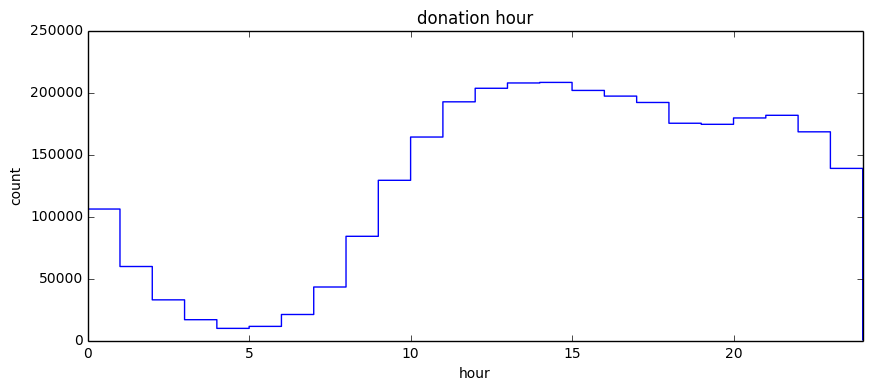

In [4]:
hr = donations.donation_timestamp.dt.hour
plt.figure(figsize=(10,4))
plt.hist(hr,bins=24,range=[0,24],histtype='step')
plt.xlabel('hour')
plt.ylabel('count')
plt.title('donation hour')
plt.xlim([0,24])
plt.show()

<b> How about donation amounts? </b>

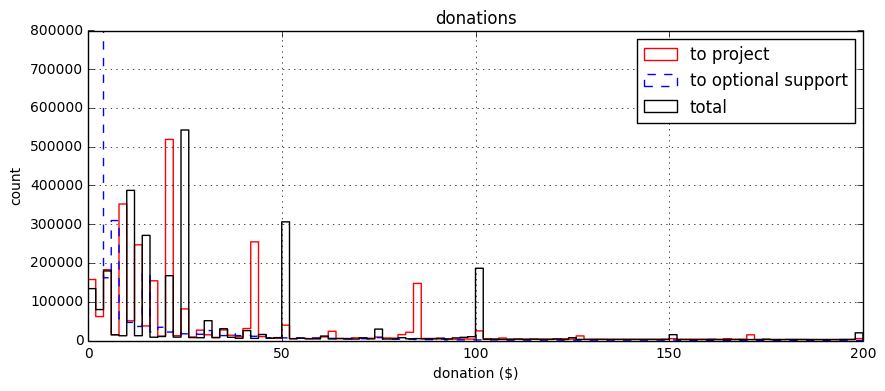

In [5]:
don_p = donations ["donation_to_project"]
don_s = donations ["donation_optional_support"]
don_t = donations ["donation_total"]
plt.figure(figsize=(10,4))
plt.hist(don_p,bins=100,color='red',label='to project',range=[0,200],histtype='step')
plt.hist(don_s,bins=100,color='blue',ls='dashed',label='to optional support',range=[0,200],histtype='step')
plt.hist(don_t,bins=100,color='black',label='total',range=[0,200],histtype='step')
plt.ylim(0,8e5)
plt.xlabel('donation ($)')
plt.ylabel('count')
plt.title('donations')
plt.legend(loc='best')
plt.grid(True)
plt.show()

<b> What info is in the projects file? </b>

In [6]:
projects = pd.read_csv('projects.csv')
projects.dtypes

projectid                                  object
teacher_acctid                             object
schoolid                                   object
school_ncesid                             float64
school_latitude                           float64
school_longitude                          float64
school_city                                object
school_state                               object
school_zip                                float64
school_metro                               object
school_district                            object
school_county                              object
school_charter                             object
school_magnet                              object
school_year_round                          object
school_nlns                                object
school_kipp                                object
school_charter_ready_promise               object
teacher_prefix                             object
teacher_teach_for_america                  object


<b> How are the schools distributed? </b>

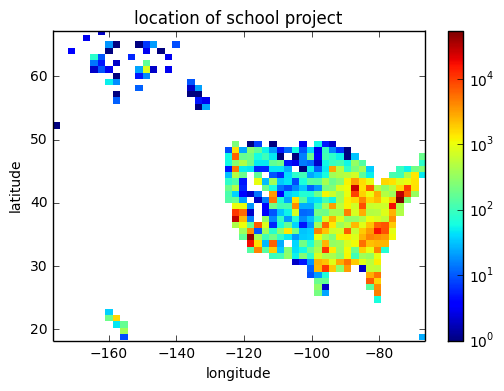

In [7]:
plt.hist2d(projects ["school_longitude"],projects ["school_latitude"],bins=50,norm=LogNorm())
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('location of school project')
plt.show()

<b> Sticking with school location, how are they distributed by poverty category? </b>

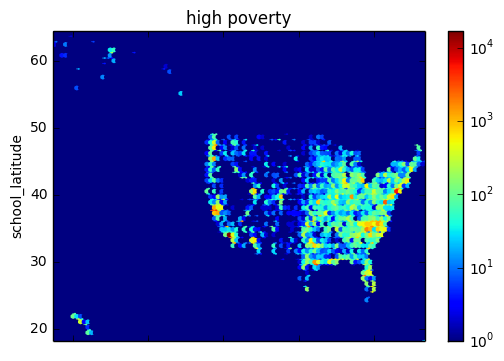

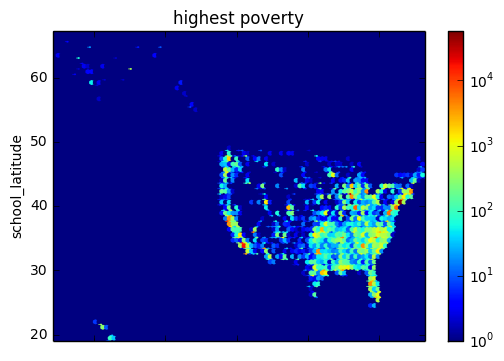

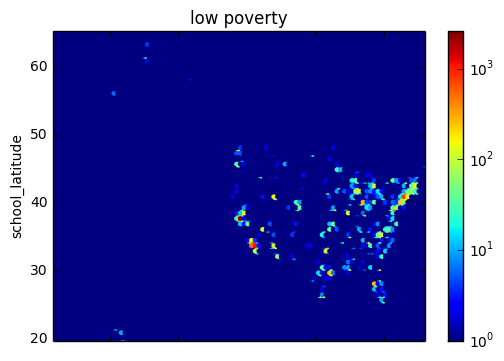

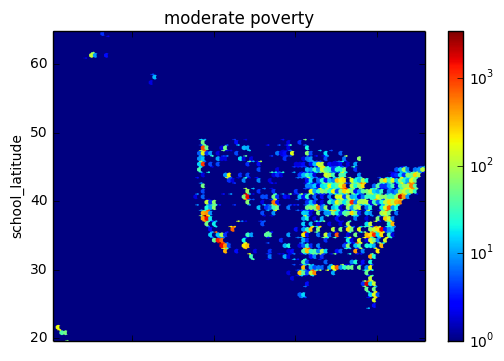

In [8]:
for i, group in projects.groupby('poverty_level'):
    plt.figure()
    group.plot(x='school_longitude',y='school_latitude', kind='hexbin',colorbar=True,colormap='jet',title=str(i),norm=LogNorm())
    #plt.colorbar()
    #plt.figure()
    #group.plot(y='school_longitude', kind='box',title=str(i))

<b> Looks like the different poverty categories are distributed differently across the country.  2D plots can be a little tricky to read, especially with a log scale, so let's confirm this with simple histograms. </b>

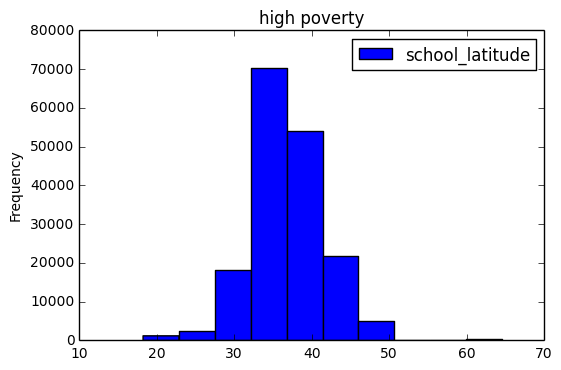

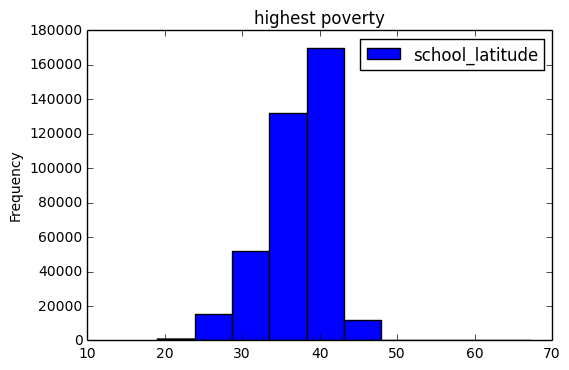

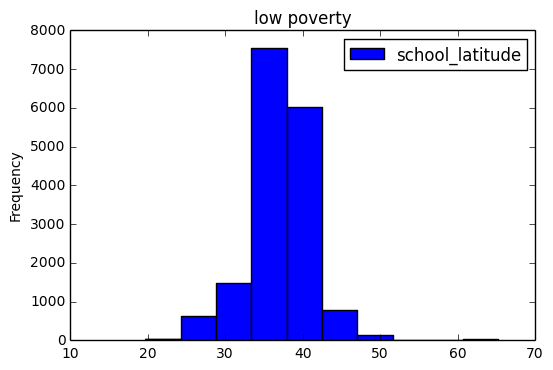

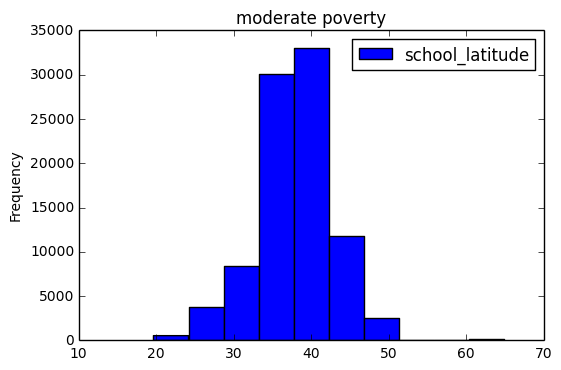

In [9]:
for i, group in projects.groupby('poverty_level'):
    plt.figure()
    group.plot(y='school_latitude', kind='hist',title=str(i))

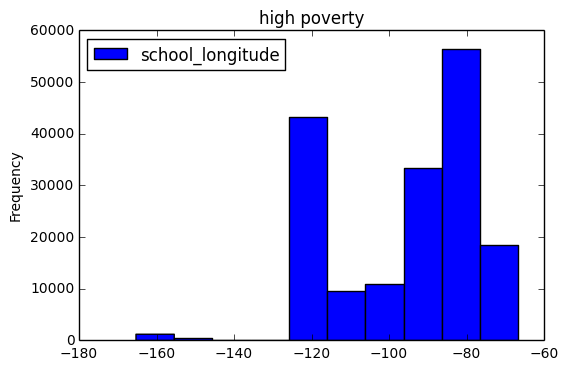

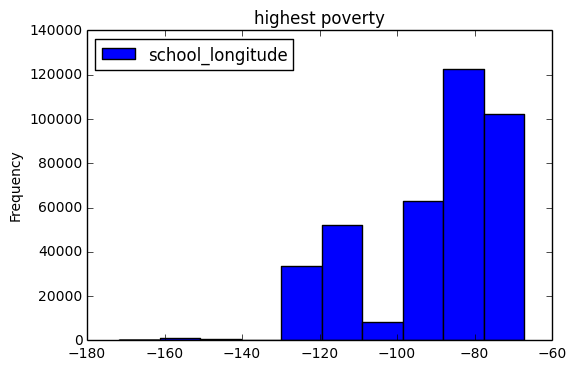

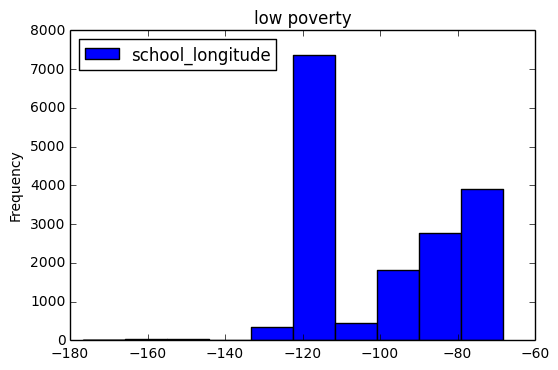

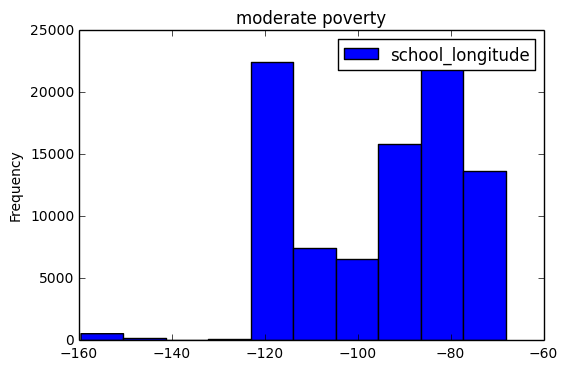

In [10]:
for i, group in projects.groupby('poverty_level'):
    plt.figure()
    group.plot(y='school_longitude', kind='hist',title=str(i))

<b> Yep. 

Let's move to the outcomes file.</b>

In [11]:
outcomes = pd.read_csv('outcomes.csv')
outcomes.dtypes

projectid                                          object
is_exciting                                        object
at_least_1_teacher_referred_donor                  object
fully_funded                                       object
at_least_1_green_donation                          object
great_chat                                         object
three_or_more_non_teacher_referred_donors          object
one_non_teacher_referred_donor_giving_100_plus     object
donation_from_thoughtful_donor                     object
great_messages_proportion                         float64
teacher_referred_count                            float64
non_teacher_referred_count                        float64
dtype: object

<b> Need to merge outcomes with projects. </b>

In [12]:
comb = pd.merge(outcomes, projects, on = 'projectid')
comb.dtypes

projectid                                          object
is_exciting                                        object
at_least_1_teacher_referred_donor                  object
fully_funded                                       object
at_least_1_green_donation                          object
great_chat                                         object
three_or_more_non_teacher_referred_donors          object
one_non_teacher_referred_donor_giving_100_plus     object
donation_from_thoughtful_donor                     object
great_messages_proportion                         float64
teacher_referred_count                            float64
non_teacher_referred_count                        float64
teacher_acctid                                     object
schoolid                                           object
school_ncesid                                     float64
school_latitude                                   float64
school_longitude                                  float64
school_city   

<b> Code speed: the pd.merge function merges about 6e5 entries in about 3 sec or 2e5 entries / sec.  In my previous C++-based solution which involved looping through each file, searching for a match and then dumping the combined into to a new file I saw a combination speed of about 1 entry per second.  Since CPU speeds used are comparable, the efficiency increase of pandas over my homegrown C++ solution is $10^5$.  Wow.

Taking advantage of this impressively efficient software, is there a correlation between a fully funded project and the number of students reached?
</b>

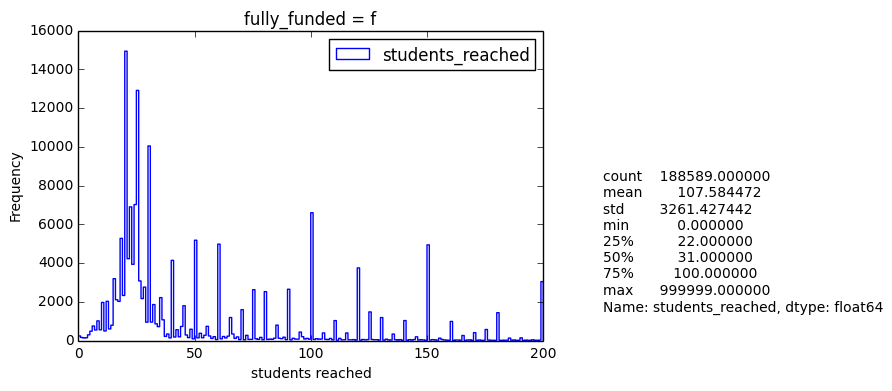

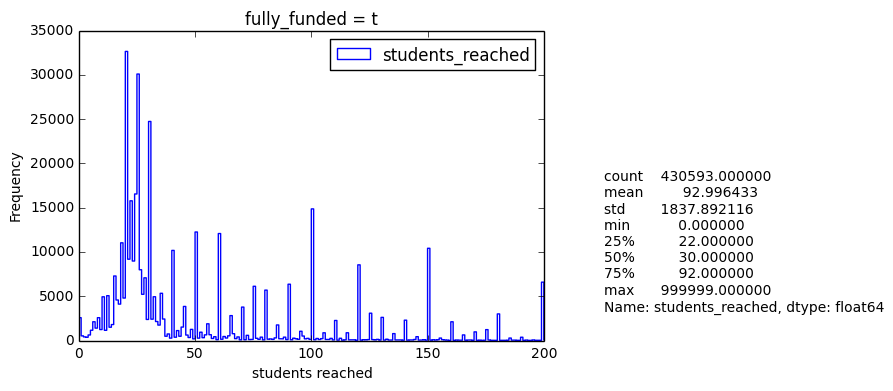

In [13]:
for i, group in comb.groupby('fully_funded'):
    plt.figure()
    group.plot(y='students_reached',bins=200,range=[0,200],kind='hist',histtype='step',title='fully_funded = '+str(i))
    #group.plot(y='students_reached',bins=200,kind='hist',histtype='step',title='fully_funded = '+str(i))
    plt.xlabel('students reached')
    plt.figtext(1.0, 0.2, group.students_reached.describe())
    #plt.ylim((0,10))

<b>Looks like not really.

Note the mean and std dev printed above are thrown off by multiple 999999 entries, presumably entered as throwaway values. 

How about anything interesting between funding level, number of students reached and total price of the project?</b>

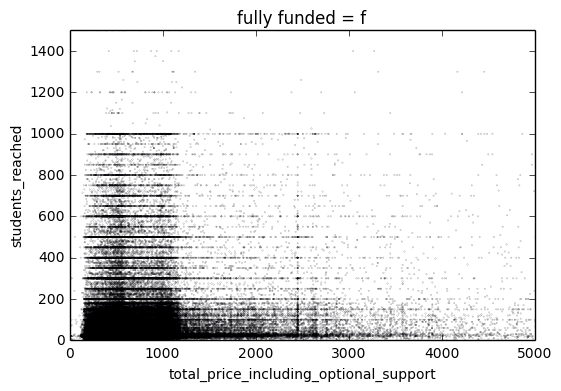

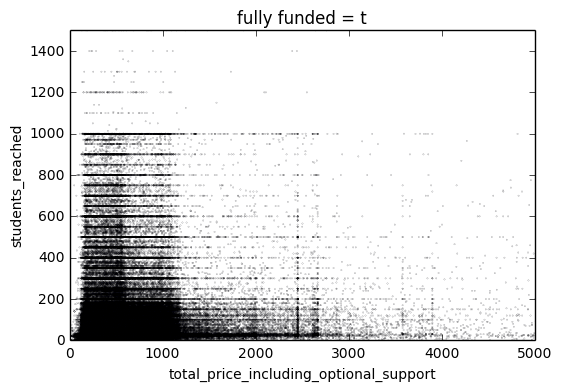

In [14]:
for i, group in comb.groupby('fully_funded'):
    plt.figure()
    #z = gaussian_kde(xy)(xy)
    #plt.colorbar()
    group.plot(x='total_price_including_optional_support',y='students_reached',kind='scatter',s=0.01,title='fully funded = '+str(i))
    plt.ylim((0,1500))    
    plt.xlim((0,5000))

<b> Fairly similar distributions with subtle differences: looks like projects with cost below $500 generally have a pretty good chance of being funded.

How about correlations between funding level and poverty category?</b>

In [15]:
comb.groupby('poverty_level')['fully_funded'].value_counts(normalize=True)

poverty_level     fully_funded
high poverty      t               0.658163
                  f               0.341837
highest poverty   t               0.726354
                  f               0.273646
low poverty       t               0.669308
                  f               0.330692
moderate poverty  t               0.639796
                  f               0.360204
Name: fully_funded, dtype: float64

<b>Fairly flat: for each poverty level about 2/3 are fully funded.

What's the distribution of grade level affected across all projects?
</b>

In [16]:
comb ['grade_level'].value_counts(normalize=True)

Grades PreK-2    0.369330
Grades 3-5       0.307896
Grades 6-8       0.172701
Grades 9-12      0.150073
Name: grade_level, dtype: float64

<b> More than 2/3 of all projects are aimed at grades 5 and below. 

Is there anything interesting in correlations between teacher prefix (gender) and 'excitement'?</b>

In [17]:
comb.groupby('teacher_prefix')['is_exciting'].value_counts(normalize=True)

teacher_prefix  is_exciting
Dr.             f              1.000000
Mr.             f              0.939463
                t              0.060537
Mr. & Mrs.      f              1.000000
Mrs.            f              0.949388
                t              0.050612
Ms.             f              0.930694
                t              0.069306
Name: is_exciting, dtype: float64

<b> I notice my previous C++-based analysis of male vs female results were wrong - instead of 6% for the category 'Mr.' somehow I got below 1%. 

How about funding level vs teacher prefix?</b>

In [18]:
comb.groupby('teacher_prefix')['fully_funded'].value_counts(normalize=True)

teacher_prefix  fully_funded
Dr.             t               1.000000
Mr.             t               0.718399
                f               0.281601
Mr. & Mrs.      t               1.000000
Mrs.            t               0.665634
                f               0.334366
Ms.             t               0.723851
                f               0.276149
Name: fully_funded, dtype: float64

<b> 100% of Dr. submissions were fully funded.  Is this significant?  Let's play with the statistics. </b>

In [19]:
comb.groupby('teacher_prefix')['fully_funded'].value_counts()

teacher_prefix  fully_funded
Dr.             t                   10
Mr.             t                56737
                f                22240
Mr. & Mrs.      t                    2
Mrs.            t               196539
                f                98727
Ms.             t               177395
                f                67676
Name: fully_funded, dtype: int64

<b> If the Dr. category had the same underlying distribution as the others we'd expect 3 of their 10 submissions to not be fully funded.  Assuming a Poisson model there's a 5% chance ($2\sigma$) the Dr. category follows the same distribution as the others and the 100% fully funded observation is a fluctuation within this distribution.  So not very significant.

$P(k,\lambda)=\frac{\lambda^k e^{-\lambda}}{k!}$  

In this case $k=0$ (observation) and $\lambda=3$ (expectation). </b>